In [1]:
#importingnecessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets import the test and train data

train=pd.read_csv("D:/Flip Robo Technologies/Internship week-9/housing project/Project-Housing_splitted/train.csv")
test=pd.read_csv("D:/Flip Robo Technologies/Internship week-9/housing project/Project-Housing_splitted/test.csv")

In [3]:
#Lets check the shape of the datasets
train.shape,test.shape

((1168, 81), (292, 80))

So our training data has 1168 rows and 81 columns and testing data 292 rows and 80 columns.

In [4]:
#Lets combine training and testing 
train["source"]="train"
test["source"]="test"
test["SalePrice"]=0

In [5]:
#Appending
data=train.append(test)

In [6]:
#Data
data.shape

(1460, 82)

So the data now has 1460 rows and 82 rows

In [7]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
source            object
Length: 82, dtype: object

In [8]:
#Lets chek the null values
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


So we have null values in 18 attributes.

In [9]:
data.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [10]:
#Lets see the categorical data and the unique vales un them
categorical_data=train.select_dtypes(include=np.object)
categorical_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,source
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,train
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,train
2,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,train
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,RFn,TA,TA,Y,NaN,MnPrv,NaN,COD,Normal,train
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,train
1164,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,...,Fin,TA,TA,N,NaN,MnPrv,NaN,WD,Normal,train
1165,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,train
1166,C (all),Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,...,Unf,TA,Fa,N,NaN,MnPrv,NaN,WD,Normal,train


So we have 44 categorical variables.

In [11]:
#Lets see the numerical data similarly
numerical_data=train.select_dtypes(include=np.number)
numerical_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,0,122,0,0,0,0,0,1,2010,190000
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,...,240,0,0,0,0,0,0,6,2009,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,NaN,9819,5,5,1967,1967,31.0,450,...,0,0,0,0,0,0,0,2,2010,122000
1164,554,20,67.0,8777,4,5,1949,2003,0.0,0,...,0,96,0,0,0,0,0,5,2009,108000
1165,196,160,24.0,2280,6,6,1976,1976,0.0,566,...,87,0,0,0,0,0,0,7,2009,148500
1166,31,70,50.0,8500,4,4,1920,1950,0.0,0,...,0,54,172,0,0,0,0,7,2008,40000


So we have 38 numerical columns.

In [12]:
#Lets see the unique values in each numerical column
for i in numerical_data:
    print('\n%s column : '%i)
    print(data[i].value_counts())


Id column : 
1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64

MSSubClass column : 
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

LotFrontage column : 
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
152.0      1
144.0      1
46.0       1
112.0      1
149.0      1
Name: LotFrontage, Length: 110, dtype: int64

LotArea column : 
7200     25
9600     24
6000     17
9000     14
10800    14
         ..
9452      1
12180     1
9439      1
7390      1
7150      1
Name: LotArea, Length: 1073, dtype: int64

OverallQual column : 
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

OverallCond column : 
5    821
6    252
7    205
8     72
4  

In [13]:
train.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
count,1168.000000,1168.000000,1168,954.00000,1168.000000,1168,77,1168,1168,1168,...,7,237,44,1168.000000,1168.000000,1168.000000,1168,1168,1168.000000,1168
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,...,3,4,4,NaN,NaN,NaN,9,6,NaN,1
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN,train
freq,NaN,NaN,928,NaN,NaN,1164,41,740,1046,1168,...,3,129,40,NaN,NaN,NaN,999,945,NaN,1168
mean,724.136130,56.767979,NaN,70.98847,10484.749144,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,47.315068,6.344178,2007.804795,NaN,NaN,181477.005993,NaN
std,416.159877,41.940650,NaN,24.82875,8957.442311,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,543.264432,2.686352,1.329738,NaN,NaN,79105.586863,NaN
min,1.000000,20.000000,NaN,21.00000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000,NaN
25%,360.500000,20.000000,NaN,60.00000,7621.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,130375.000000,NaN
50%,714.500000,50.000000,NaN,70.00000,9522.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163995.000000,NaN
75%,1079.500000,70.000000,NaN,80.00000,11515.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,215000.000000,NaN


1.Most of the people tend to buy houses in  residential low density zone, out of 1168 928 has preffered this zone.

2.The highest lot area brought has area equal to 16466 and the min area preffered is 1300sq.feet.

3.1164 houses have  paved road access where as only 4 has gravel access .

4.Out of 77 there are only 41 paved alley access and 20 are gravel access others dont have access.

5.740 people out of 1168 prefer regular lot size.

6.1046 prefer near flat or level land contour.

7.1168 houses has all public utilities including electricity,gas,water and sewage.

8.Lot config: Most of them prefer inside lot that is lot sorrounded by two lots on other side.
    
9.1105 prefer gentle slope property

10.182 houses are located near  North Ames.

11.Most of them prefer single family detached lots.

12.More than 50% of the houses built are 1  story houses.

13.More than 90% of the houses have gable roofstyles.

14. Standard Composite shingle is used to build the roofs.

15.Exterior coverin on the house is built using vinyl sliding.

16.696 of the houses dont have mansonry veneer.

17.The most common opinion of the external quality and the condition is average or typical.

18.50% of the house has cider block foundation.

19.756 houses does not have basement.

20.1143 houses has gas forced warmair furnace for heating.

21.Heating condition is excellent.

22.1090 prefer central air conditioning.

23.1070 houseshave standard ciruit breakers and romex.

24.334 sqrt is the minimum area of the first floor and highest area of 2nd floor is 2065.

25.Living area minimum area is 334 and the mean is 1525.

26.Minimum Number of full bathrooms in the basement is 0 and the max is 3.

27.Minimum Number of half bathrooms in the basement is 0 and the max is 2.

28.Minimum Number of half bathrooms above ground is 0 and the max is 3.

29..Minimum Number of half bathrooms above ground is 0 and the max is 2.

30.Minimum bedrooms above ground is 0 and the maximum is 8.

31.Minimum Kitchen above ground is 0 and max is 3.

40.Out total number of kitchens 50% of the kichens are rated typical or average.

41.There are minimum of 2 rooms above ground excluding bathrroms and the maz rooms above gground are 13.

42.1085 houses oit of 1168 are typical means no deductions.

43.Max number of fireplace is 0 and max is 3.

45.Nearly 50% of the fireplaces have been rated good.

46.Out of 1104 garages 617 are attached garages.

47.Out of 1104 481 garage's interior is unfinished.

48.Max cpacity of garage is 4 cars.

49.Max are of garage is 1418 and the mean is  476.

50.1104 garage's are rated average.

51.1071 houses have paved driveway.

52.92 is the mean area of wooddek and the max are is 876.

58.46 square feet is mean area of open porch and the max is 547.

59.23 is mean area of closed porch and max is 552.

60.Maz pool area is 738.

61.Out of 237 129 have mimimum privacy fence.

62.Out of 1168 975 are normal sale type.

63.Minimum sale price is 34900and max is 755000.


# Handling null values

In [14]:
data["LotFrontage"].fillna(70.98847,inplace=True)
data["MasVnrType"].fillna("No Alley Access",inplace=True)          
data["MasVnrArea"].fillna(102.310078,inplace=True)         
data["BsmtQual"].fillna("No Basement",inplace=True)          
data["BsmtCond"].fillna("No Basement",inplace=True)         
data["BsmtExposure"].fillna("No Basement",inplace=True)       
data["BsmtFinType1"].fillna("No Basement",inplace=True)       
data["BsmtFinType2"].fillna("No Basement",inplace=True)       
data["Electrical"].fillna("None",inplace=True)         
data["GarageType"].fillna("No garage",inplace=True)        
data["GarageYrBlt"].fillna("No garage",inplace=True)      
data["GarageFinish"].fillna("No garage",inplace=True)        
data["GarageQual"].fillna("No garage",inplace=True)          
data["GarageCond"].fillna("No garage",inplace=True)         

# Univariate and Bivariate analysis of categorical variables

# MSZoning 

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'RL'),
  Text(1, 0, 'RM'),
  Text(2, 0, 'FV'),
  Text(3, 0, 'RH'),
  Text(4, 0, 'C (all)')])

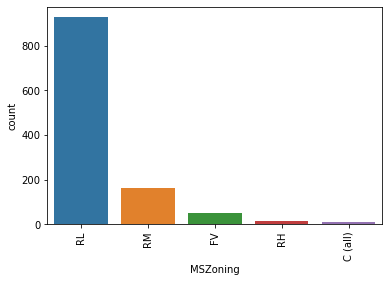

In [15]:
print(train["MSZoning"].value_counts())
sns.countplot(train["MSZoning"])
plt.xticks(rotation=90)

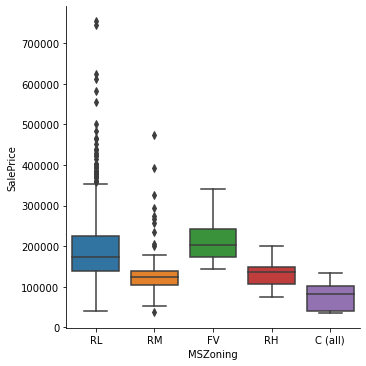

In [16]:
sns.catplot(x="MSZoning", y="SalePrice", kind="box", data=train)

1.Most of the customers prefer Residential Low Density and the sales price is highest for Residential Low Density.

2.Compared to other zones commerial zone is the one which goes for low price and very less people opt for it.


# Street

Pave    1164
Grvl       4
Name: Street, dtype: int64


(array([0, 1]), [Text(0, 0, 'Pave'), Text(1, 0, 'Grvl')])

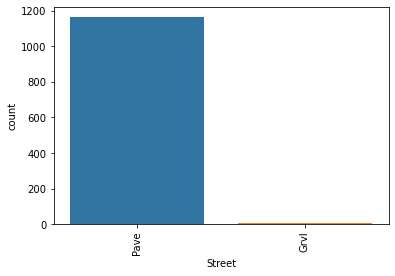

In [17]:
print(train["Street"].value_counts())
sns.countplot(train["Street"])
plt.xticks(rotation=90)

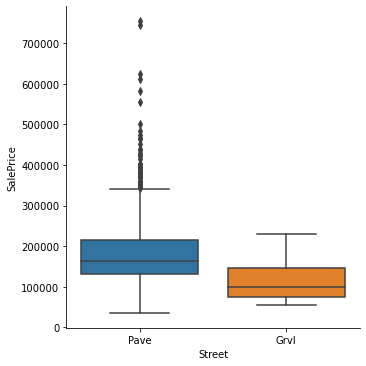

In [18]:
sns.catplot(x="Street", y="SalePrice", kind="box", data=train)

Paved streets are preffered more and price is higher for paved than the gravel.

Alley access to property are gravel and paved.Both are preffered but paved cost is higher.

# LotShape

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'IR1'), Text(1, 0, 'Reg'), Text(2, 0, 'IR2'), Text(3, 0, 'IR3')])

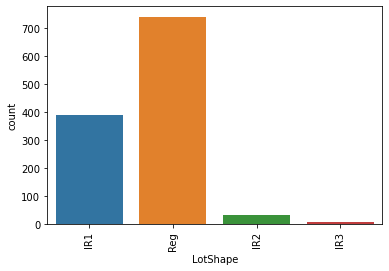

In [19]:
print(train["LotShape"].value_counts())
sns.countplot(train["LotShape"])
plt.xticks(rotation=90)

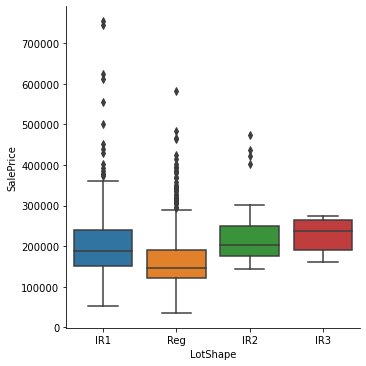

In [20]:
sns.catplot(x="LotShape", y="SalePrice", kind="box", data=train)

1.Most of them prefer regular shape of the property and slightly irregular is also acceptable but moderately and irregular
  shape of the property is unaceptable.
2.Maximum price of regular shape is almost equal to the median of slightly irregular shape.

# LandContour

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Lvl'), Text(1, 0, 'Bnk'), Text(2, 0, 'HLS'), Text(3, 0, 'Low')])

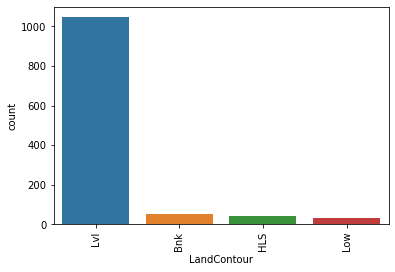

In [21]:
print(train["LandContour"].value_counts())
sns.countplot(train["LandContour"])
plt.xticks(rotation=90)

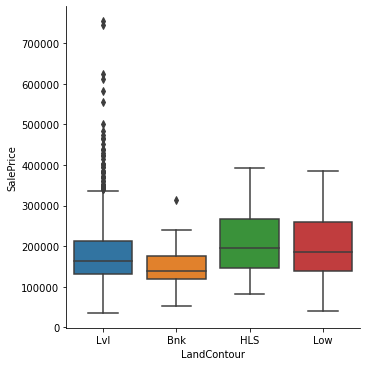

In [22]:
sns.catplot(x="LandContour", y="SalePrice", kind="box", data=train)

1.Most of the people prefer nearflat or level land contour.

# Utilities

AllPub    1168
Name: Utilities, dtype: int64


(array([0]), [Text(0, 0, 'AllPub')])

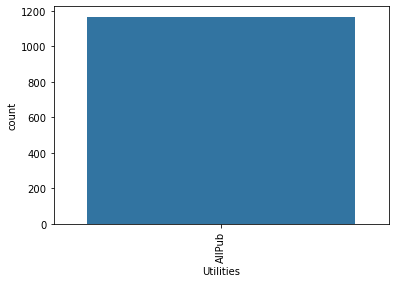

In [23]:
print(train["Utilities"].value_counts())
sns.countplot(train["Utilities"])
plt.xticks(rotation=90)

All of them prefer houses with all the facilities.

# LotConfig

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Inside'),
  Text(1, 0, 'CulDSac'),
  Text(2, 0, 'FR2'),
  Text(3, 0, 'Corner'),
  Text(4, 0, 'FR3')])

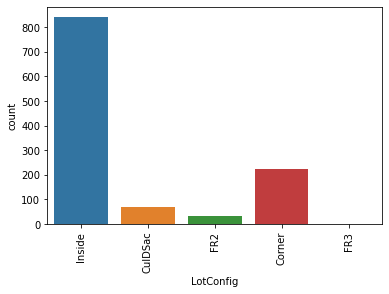

In [24]:
print(train["LotConfig"].value_counts())
sns.countplot(train["LotConfig"])
plt.xticks(rotation=90)

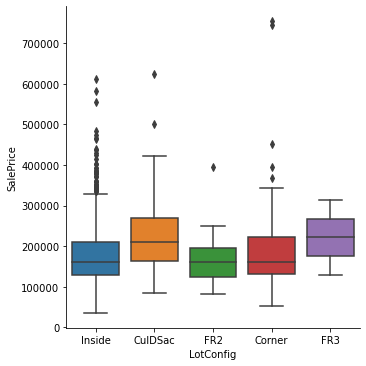

In [25]:
sns.catplot(x="LotConfig", y="SalePrice", kind="box", data=train)

Most of the buyers prefer inside configuration but we can see that Corner config costs maximum.
FR3 is not likely to be preffered.

# LandSlope

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


(array([0, 1, 2]), [Text(0, 0, 'Gtl'), Text(1, 0, 'Mod'), Text(2, 0, 'Sev')])

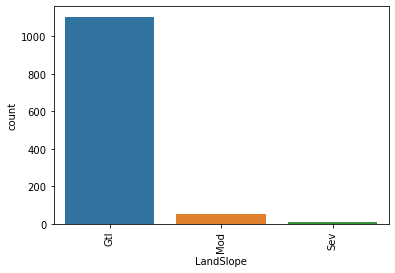

In [26]:
print(train["LandSlope"].value_counts())
sns.countplot(train["LandSlope"])
plt.xticks(rotation=90)

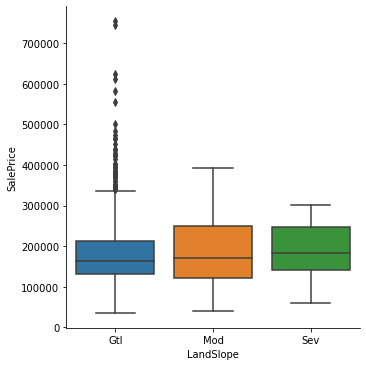

In [27]:
sns.catplot(x="LandSlope", y="SalePrice", kind="box", data=train)

1.Gentle slope is preffered.

2.Severely sloped is not preffered.


# Neighborhood

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
Veenker      9
MeadowV      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'NPkVill'),
  Text(1, 0, 'NAmes'),
  Text(2, 0, 'NoRidge'),
  Text(3, 0, 'NWAmes'),
  Text(4, 0, 'Gilbert'),
  Text(5, 0, 'Sawyer'),
  Text(6, 0, 'Edwards'),
  Text(7, 0, 'IDOTRR'),
  Text(8, 0, 'CollgCr'),
  Text(9, 0, 'Mitchel'),
  Text(10, 0, 'Crawfor'),
  Text(11, 0, 'BrDale'),
  Text(12, 0, 'StoneBr'),
  Text(13, 0, 'BrkSide'),
  Text(14, 0, 'NridgHt'),
  Text(15, 0, 'OldTown'),
  Text(16, 0, 'Somerst'),
  Text(17, 0, 'Timber'),
  Text(18, 0, 'SWISU'),
  Text(19, 0, 'SawyerW'),
  Text(20, 0, 'ClearCr'),
  Text(21, 0, 'Veenker'),
  Text(22, 0, 'Blmngtn'),
  Text(23, 0, 'MeadowV'),
  Text(24, 0, 'Blueste')])

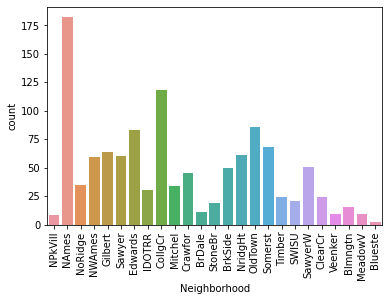

In [28]:
print(train["Neighborhood"].value_counts())
sns.countplot(train["Neighborhood"])
plt.xticks(rotation=90)

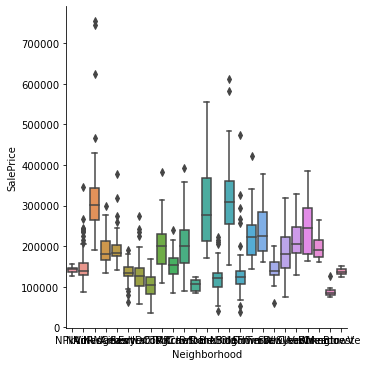

In [29]:
sns.catplot(x="Neighborhood", y="SalePrice", kind="box", data=train)

Location of boxplots say that te distrubution is spread all over and the houses near StonerBr seems costliest because the minimu cost in that place 
starts from 1,40000 approximately.
Many houses are brougt in North Ames and are affordable.
Very much less houses preffered in the areas NPKvill,MeadowVand Bluetse.

# Condition1 

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Norm'),
  Text(1, 0, 'Feedr'),
  Text(2, 0, 'RRAn'),
  Text(3, 0, 'PosA'),
  Text(4, 0, 'RRAe'),
  Text(5, 0, 'Artery'),
  Text(6, 0, 'PosN'),
  Text(7, 0, 'RRNe'),
  Text(8, 0, 'RRNn')])

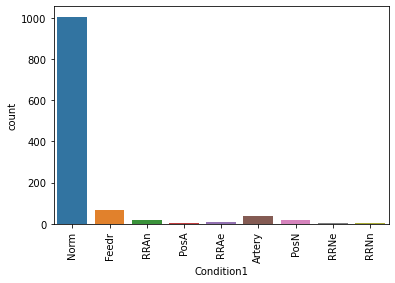

In [30]:
print(train["Condition1"].value_counts())
sns.countplot(train["Condition1"])
plt.xticks(rotation=90)

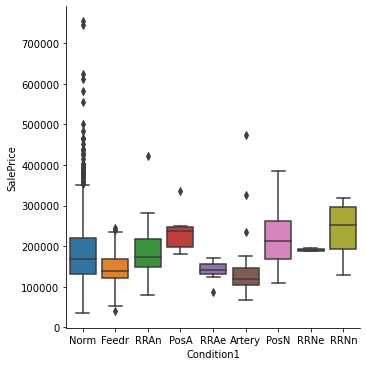

In [31]:
sns.catplot(x="Condition1", y="SalePrice", kind="box", data=train)

# Condition2

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAn         1
PosA         1
RRNn         1
RRAe         1
Name: Condition2, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Norm'),
  Text(1, 0, 'RRAe'),
  Text(2, 0, 'Feedr'),
  Text(3, 0, 'PosN'),
  Text(4, 0, 'Artery'),
  Text(5, 0, 'RRNn'),
  Text(6, 0, 'PosA'),
  Text(7, 0, 'RRAn')])

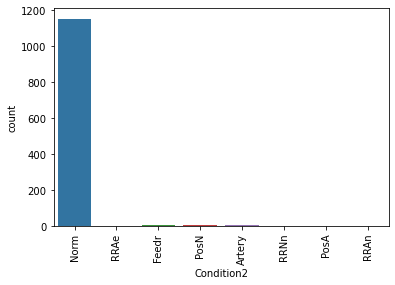

In [32]:
print(train["Condition2"].value_counts())
sns.countplot(train["Condition2"])
plt.xticks(rotation=90)

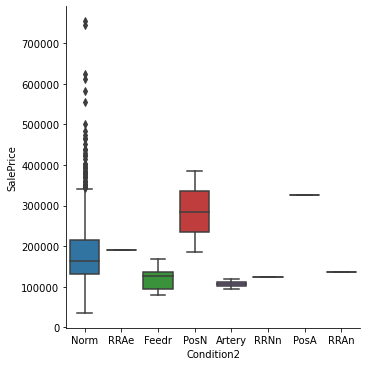

In [33]:
sns.catplot(x="Condition2", y="SalePrice", kind="box", data=train)

# BldgType

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TwnhsE'),
  Text(1, 0, '1Fam'),
  Text(2, 0, 'Duplex'),
  Text(3, 0, 'Twnhs'),
  Text(4, 0, '2fmCon')])

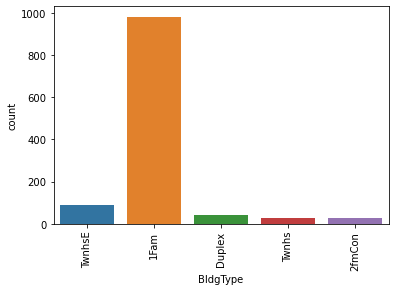

In [34]:
print(train["BldgType"].value_counts())
sns.countplot(train["BldgType"])
plt.xticks(rotation=90)

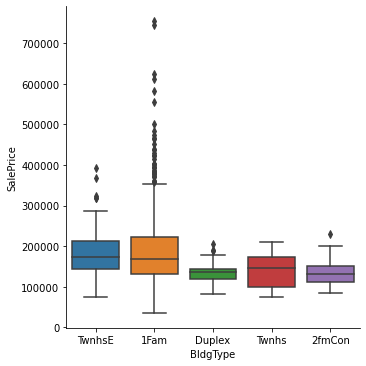

In [35]:
sns.catplot(x="BldgType", y="SalePrice", kind="box", data=train)

Most of them prefer 1Family dwelling

# HouseStyle

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1Story'),
  Text(1, 0, '2Story'),
  Text(2, 0, '1.5Fin'),
  Text(3, 0, 'SFoyer'),
  Text(4, 0, '1.5Unf'),
  Text(5, 0, 'SLvl'),
  Text(6, 0, '2.5Fin'),
  Text(7, 0, '2.5Unf')])

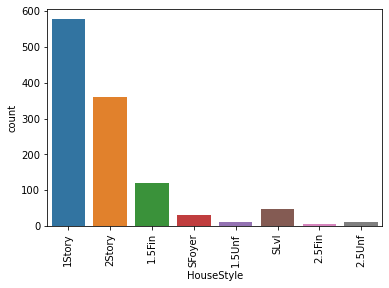

In [36]:
print(train["HouseStyle"].value_counts())
sns.countplot(train["HouseStyle"])
plt.xticks(rotation=90)

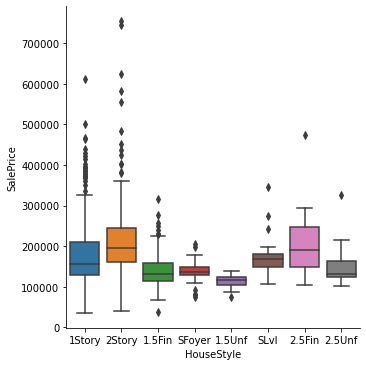

In [37]:
sns.catplot(x="HouseStyle", y="SalePrice", kind="box", data=train)

# OverallQual

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

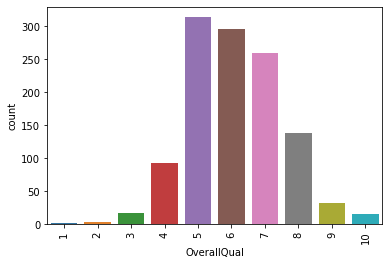

In [38]:
print(train["OverallQual"].value_counts())
sns.countplot(train["OverallQual"])
plt.xticks(rotation=90)

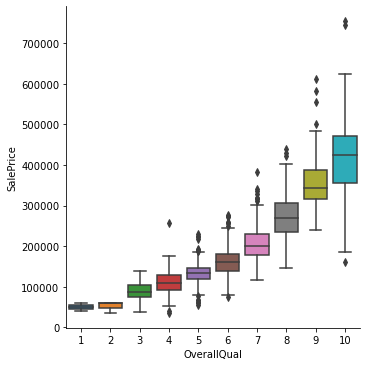

In [39]:
sns.catplot(x="OverallQual", y="SalePrice", kind="box", data=train)

# OverallCond

5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

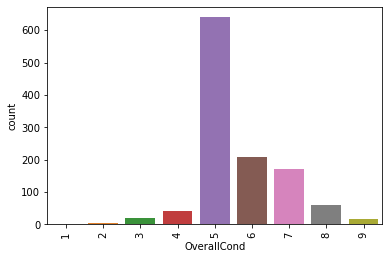

In [40]:
print(train["OverallCond"].value_counts())
sns.countplot(train["OverallCond"])
plt.xticks(rotation=90)

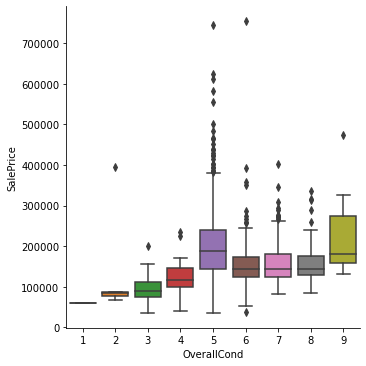

In [41]:
sns.catplot(x="OverallCond", y="SalePrice", kind="box", data=train)

# RoofStyle

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Gable'),
  Text(1, 0, 'Flat'),
  Text(2, 0, 'Hip'),
  Text(3, 0, 'Shed'),
  Text(4, 0, 'Gambrel'),
  Text(5, 0, 'Mansard')])

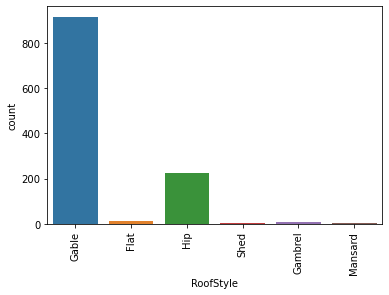

In [42]:
print(train["RoofStyle"].value_counts())
sns.countplot(train["RoofStyle"])
plt.xticks(rotation=90)

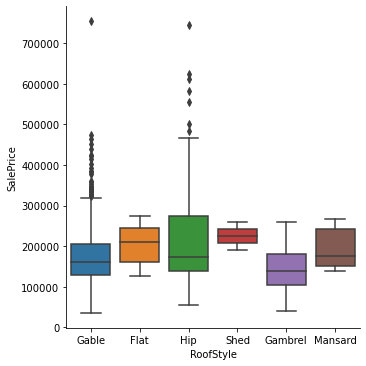

In [43]:
sns.catplot(x="RoofStyle", y="SalePrice", kind="box", data=train)

Desired roofstyle is gable and lowest price of mansard and shed is high .The highest is paid for hip roof style.

# RoofMatl

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Metal         1
Membran       1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'CompShg'),
  Text(1, 0, 'Tar&Grv'),
  Text(2, 0, 'WdShngl'),
  Text(3, 0, 'WdShake'),
  Text(4, 0, 'Roll'),
  Text(5, 0, 'ClyTile'),
  Text(6, 0, 'Metal'),
  Text(7, 0, 'Membran')])

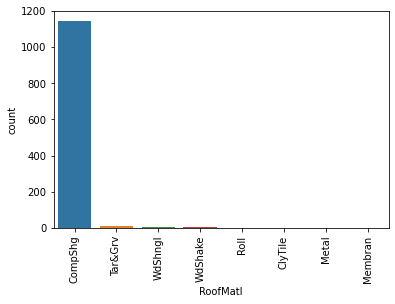

In [44]:
print(train["RoofMatl"].value_counts())
sns.countplot(train["RoofMatl"])
plt.xticks(rotation=90)

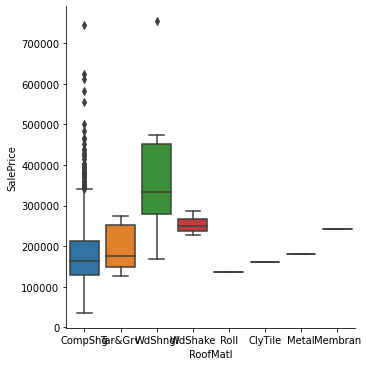

In [45]:
sns.catplot(x="RoofMatl", y="SalePrice", kind="box", data=train)

Standard composite shingle is used for building roofs and wood shingles is comparitively costly.

# Exterior1st 

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
AsphShn      1
BrkComm      1
ImStucc      1
Name: Exterior1st, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Plywood'),
  Text(1, 0, 'Wd Sdng'),
  Text(2, 0, 'MetalSd'),
  Text(3, 0, 'CemntBd'),
  Text(4, 0, 'VinylSd'),
  Text(5, 0, 'HdBoard'),
  Text(6, 0, 'Stucco'),
  Text(7, 0, 'WdShing'),
  Text(8, 0, 'BrkFace'),
  Text(9, 0, 'Stone'),
  Text(10, 0, 'AsbShng'),
  Text(11, 0, 'AsphShn'),
  Text(12, 0, 'ImStucc'),
  Text(13, 0, 'BrkComm')])

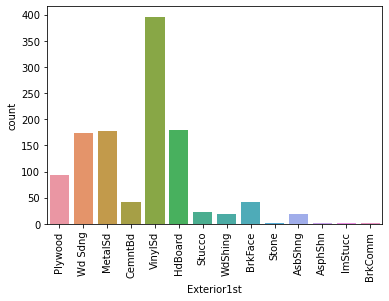

In [46]:
print(train["Exterior1st"].value_counts())
sns.countplot(train["Exterior1st"])
plt.xticks(rotation=90)

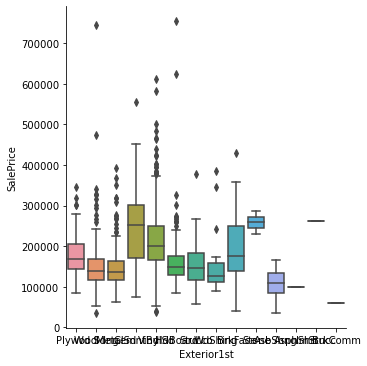

In [47]:
sns.catplot(x="Exterior1st", y="SalePrice", kind="box", data=train)

Most of the houses have vinyl sliding 

# Exterior2nd 

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Plywood'),
  Text(1, 0, 'Wd Sdng'),
  Text(2, 0, 'MetalSd'),
  Text(3, 0, 'CmentBd'),
  Text(4, 0, 'VinylSd'),
  Text(5, 0, 'HdBoard'),
  Text(6, 0, 'Wd Shng'),
  Text(7, 0, 'Stucco'),
  Text(8, 0, 'ImStucc'),
  Text(9, 0, 'Stone'),
  Text(10, 0, 'BrkFace'),
  Text(11, 0, 'AsbShng'),
  Text(12, 0, 'Brk Cmn'),
  Text(13, 0, 'AsphShn'),
  Text(14, 0, 'Other')])

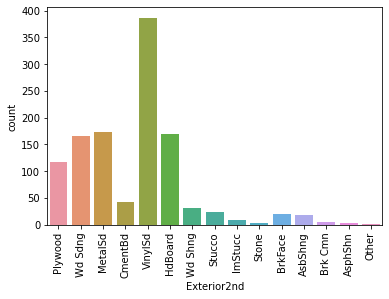

In [48]:
print(train["Exterior2nd"].value_counts())
sns.countplot(train["Exterior2nd"])
plt.xticks(rotation=90)

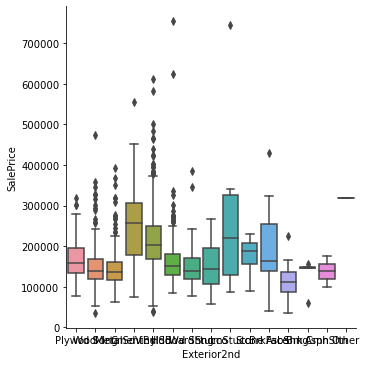

In [49]:
sns.catplot(x="Exterior2nd", y="SalePrice", kind="box", data=train)

# MasVnrType

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'None'),
  Text(1, 0, 'BrkFace'),
  Text(2, 0, 'Stone'),
  Text(3, 0, 'BrkCmn')])

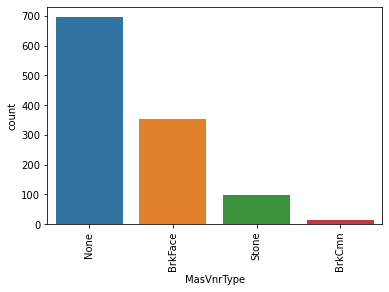

In [50]:
print(train["MasVnrType"].value_counts())
sns.countplot(train["MasVnrType"])
plt.xticks(rotation=90)

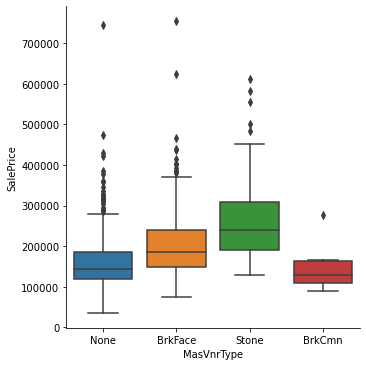

In [51]:
sns.catplot(x="MasVnrType", y="SalePrice", kind="box", data=train)

# ExterQual

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'TA'), Text(1, 0, 'Gd'), Text(2, 0, 'Ex'), Text(3, 0, 'Fa')])

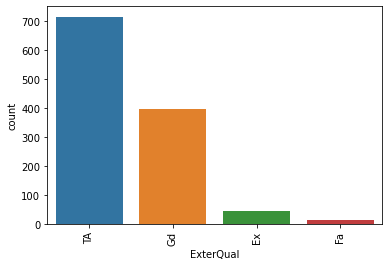

In [52]:
print(train["ExterQual"].value_counts())
sns.countplot(train["ExterQual"])
plt.xticks(rotation=90)

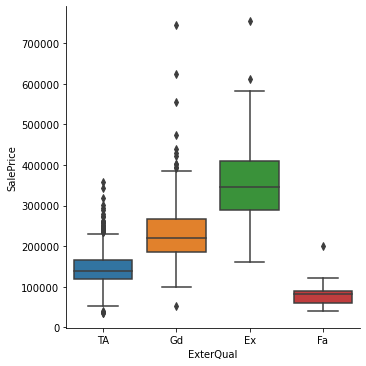

In [53]:
sns.catplot(x="ExterQual", y="SalePrice", kind="box", data=train)

# ExterCond

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Gd'),
  Text(2, 0, 'Fa'),
  Text(3, 0, 'Po'),
  Text(4, 0, 'Ex')])

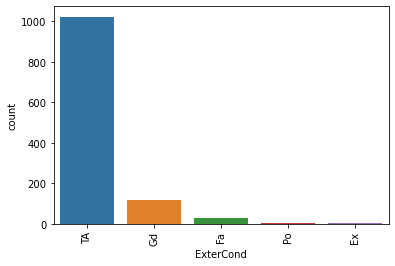

In [54]:
print(train["ExterCond"].value_counts())
sns.countplot(train["ExterCond"])
plt.xticks(rotation=90)

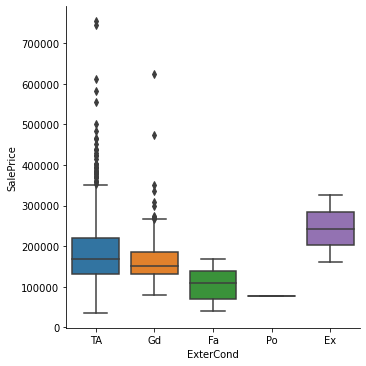

In [55]:
sns.catplot(x="ExterCond", y="SalePrice", kind="box", data=train)

# Foundation

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'CBlock'),
  Text(1, 0, 'PConc'),
  Text(2, 0, 'BrkTil'),
  Text(3, 0, 'Slab'),
  Text(4, 0, 'Stone'),
  Text(5, 0, 'Wood')])

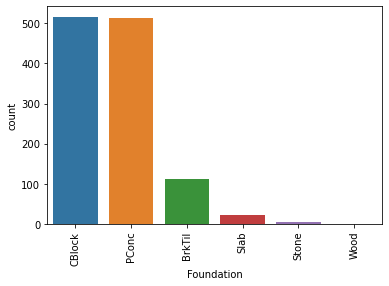

In [56]:
print(train["Foundation"].value_counts())
sns.countplot(train["Foundation"])
plt.xticks(rotation=90)

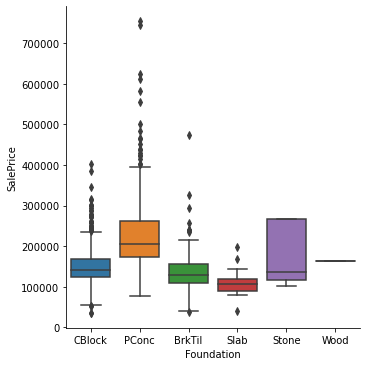

In [57]:
sns.catplot(x="Foundation", y="SalePrice", kind="box", data=train)

# BsmtQual

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Gd'), Text(1, 0, 'TA'), Text(2, 0, 'Ex'), Text(3, 0, 'Fa')])

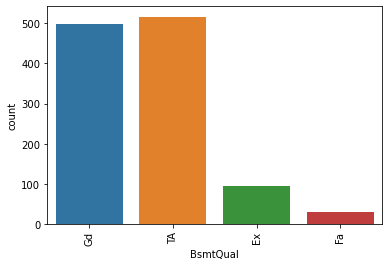

In [58]:
print(train["BsmtQual"].value_counts())
sns.countplot(train["BsmtQual"])
plt.xticks(rotation=90)

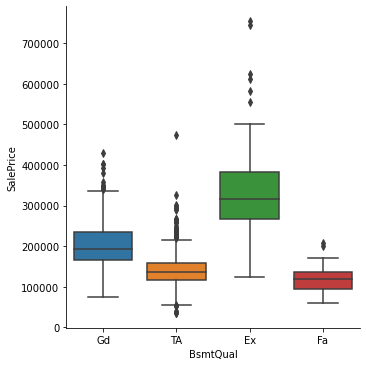

In [59]:
sns.catplot(x="BsmtQual", y="SalePrice", kind="box", data=train)

# BsmtCond

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'TA'), Text(1, 0, 'Gd'), Text(2, 0, 'Fa'), Text(3, 0, 'Po')])

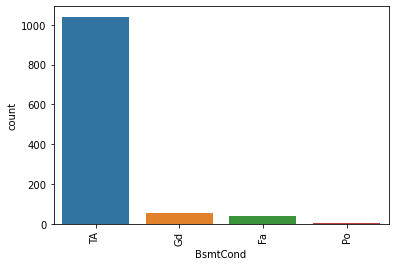

In [60]:
print(train["BsmtCond"].value_counts())
sns.countplot(train["BsmtCond"])
plt.xticks(rotation=90)

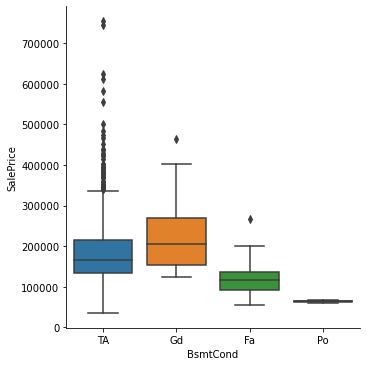

In [61]:
sns.catplot(x="BsmtCond", y="SalePrice", kind="box", data=train)

# BsmtExposure 

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'), Text(1, 0, 'Gd'), Text(2, 0, 'Av'), Text(3, 0, 'Mn')])

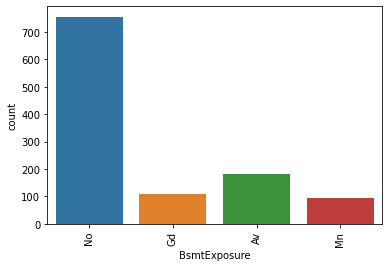

In [62]:
print(train["BsmtExposure"].value_counts())
sns.countplot(train["BsmtExposure"])
plt.xticks(rotation=90)

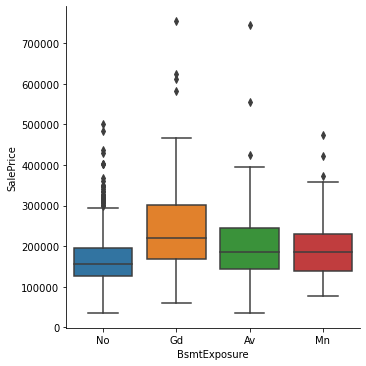

In [63]:
sns.catplot(x="BsmtExposure", y="SalePrice", kind="box", data=train)

# BsmtFinType1

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'ALQ'),
  Text(1, 0, 'GLQ'),
  Text(2, 0, 'BLQ'),
  Text(3, 0, 'Unf'),
  Text(4, 0, 'Rec'),
  Text(5, 0, 'LwQ')])

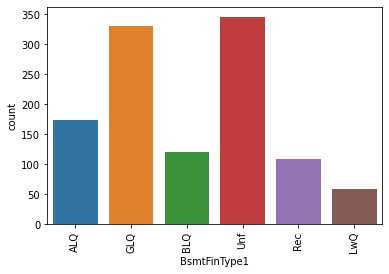

In [64]:
print(train["BsmtFinType1"].value_counts())
sns.countplot(train["BsmtFinType1"])
plt.xticks(rotation=90)

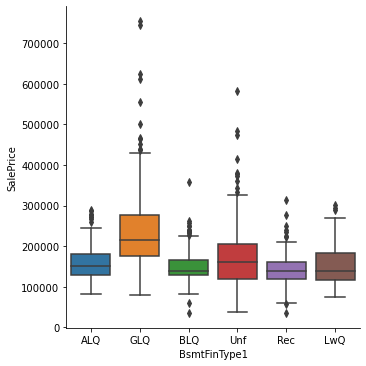

In [65]:
sns.catplot(x="BsmtFinType1", y="SalePrice", kind="box", data=train)

# BsmtFinType2

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unf'),
  Text(1, 0, 'Rec'),
  Text(2, 0, 'BLQ'),
  Text(3, 0, 'GLQ'),
  Text(4, 0, 'ALQ'),
  Text(5, 0, 'LwQ')])

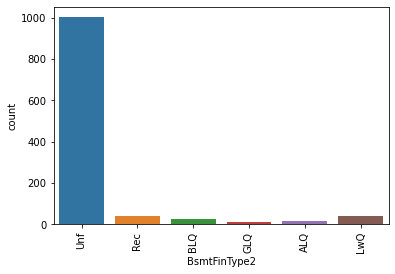

In [66]:
print(train["BsmtFinType2"].value_counts())
sns.countplot(train["BsmtFinType2"])
plt.xticks(rotation=90)

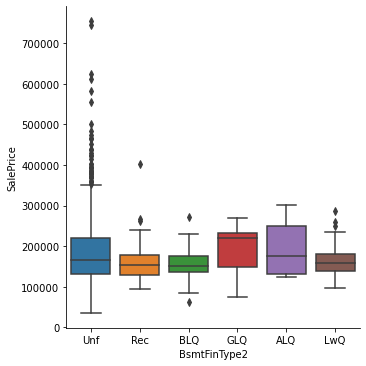

In [67]:
sns.catplot(x="BsmtFinType2", y="SalePrice", kind="box", data=train)

# Heating

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'GasA'),
  Text(1, 0, 'GasW'),
  Text(2, 0, 'Floor'),
  Text(3, 0, 'OthW'),
  Text(4, 0, 'Wall'),
  Text(5, 0, 'Grav')])

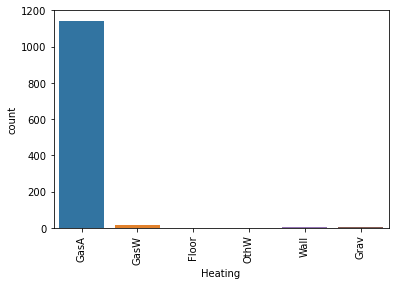

In [68]:
print(train["Heating"].value_counts())
sns.countplot(train["Heating"])
plt.xticks(rotation=90)

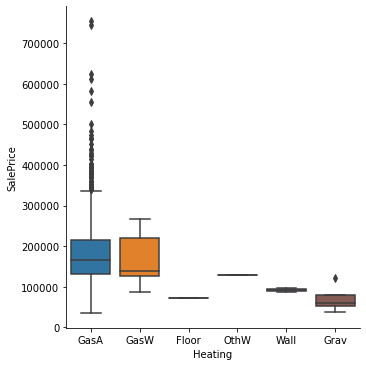

In [69]:
sns.catplot(x="Heating", y="SalePrice", kind="box", data=train)

# HeatingQC

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Ex'),
  Text(2, 0, 'Gd'),
  Text(3, 0, 'Fa'),
  Text(4, 0, 'Po')])

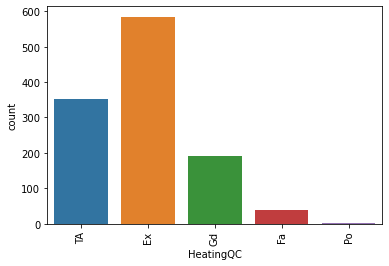

In [70]:
print(train["HeatingQC"].value_counts())
sns.countplot(train["HeatingQC"])
plt.xticks(rotation=90)

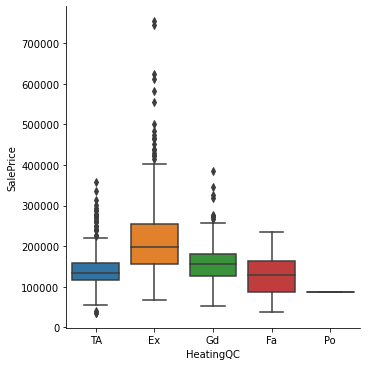

In [71]:
sns.catplot(x="HeatingQC", y="SalePrice", kind="box", data=train)

# CentralAir

Y    1090
N      78
Name: CentralAir, dtype: int64


(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

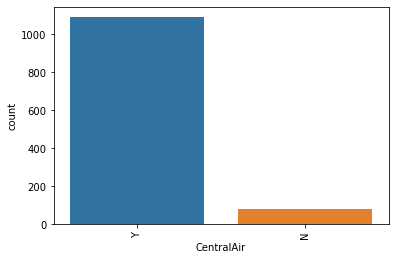

In [72]:
print(train["CentralAir"].value_counts())
sns.countplot(train["CentralAir"])
plt.xticks(rotation=90)

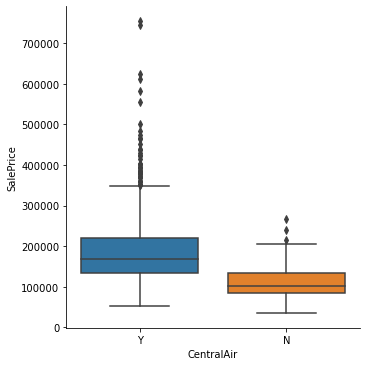

In [73]:
sns.catplot(x="CentralAir", y="SalePrice", kind="box", data=train)

# Electrical

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SBrkr'),
  Text(1, 0, 'FuseA'),
  Text(2, 0, 'FuseF'),
  Text(3, 0, 'FuseP'),
  Text(4, 0, 'Mix')])

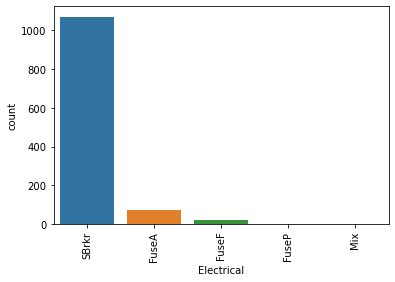

In [74]:
print(train["Electrical"].value_counts())
sns.countplot(train["Electrical"])
plt.xticks(rotation=90)

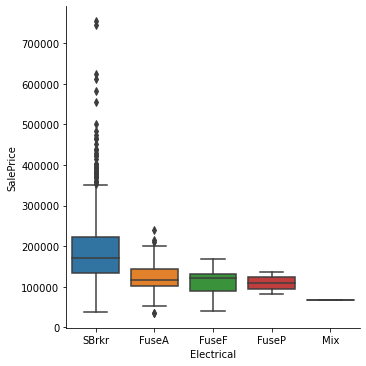

In [75]:
sns.catplot(x="Electrical", y="SalePrice", kind="box", data=train)

# KitchenQual

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'TA'), Text(1, 0, 'Gd'), Text(2, 0, 'Ex'), Text(3, 0, 'Fa')])

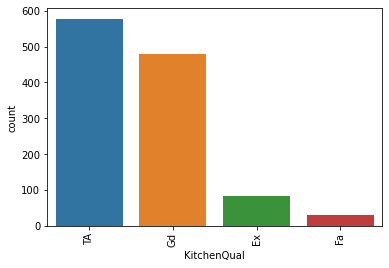

In [76]:
print(train["KitchenQual"].value_counts())
sns.countplot(train["KitchenQual"])
plt.xticks(rotation=90)

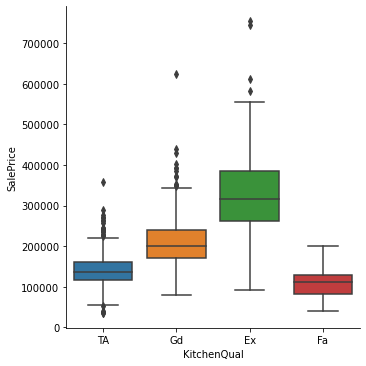

In [77]:
sns.catplot(x="KitchenQual", y="SalePrice", kind="box", data=train)

# Functional

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Typ'),
  Text(1, 0, 'Mod'),
  Text(2, 0, 'Maj1'),
  Text(3, 0, 'Min1'),
  Text(4, 0, 'Min2'),
  Text(5, 0, 'Sev'),
  Text(6, 0, 'Maj2')])

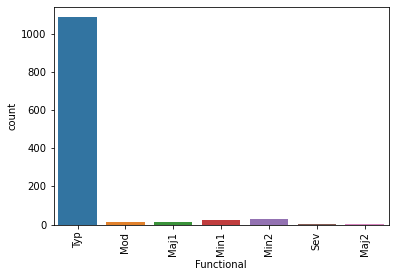

In [78]:
print(train["Functional"].value_counts())
sns.countplot(train["Functional"])
plt.xticks(rotation=90)

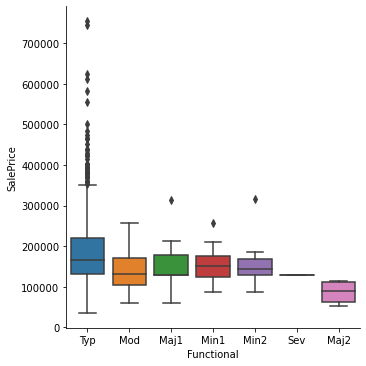

In [79]:
sns.catplot(x="Functional", y="SalePrice", kind="box", data=train)

# GarageType

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Attchd'),
  Text(1, 0, 'BuiltIn'),
  Text(2, 0, 'Detchd'),
  Text(3, 0, 'Basment'),
  Text(4, 0, '2Types'),
  Text(5, 0, 'CarPort')])

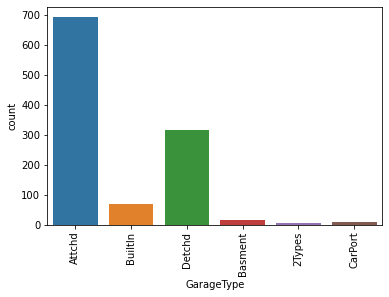

In [80]:
print(train["GarageType"].value_counts())
sns.countplot(train["GarageType"])
plt.xticks(rotation=90)

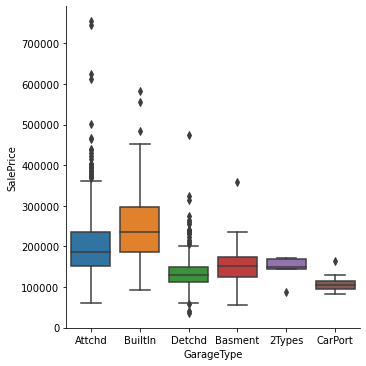

In [81]:
sns.catplot(x="GarageType", y="SalePrice", kind="box", data=train)

# GarageFinish

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


(array([0, 1, 2]), [Text(0, 0, 'RFn'), Text(1, 0, 'Unf'), Text(2, 0, 'Fin')])

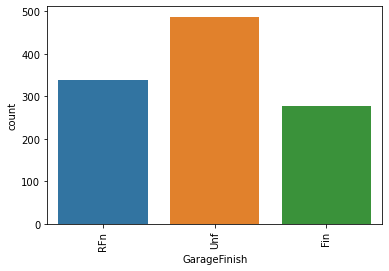

In [82]:
print(train["GarageFinish"].value_counts())
sns.countplot(train["GarageFinish"])
plt.xticks(rotation=90)

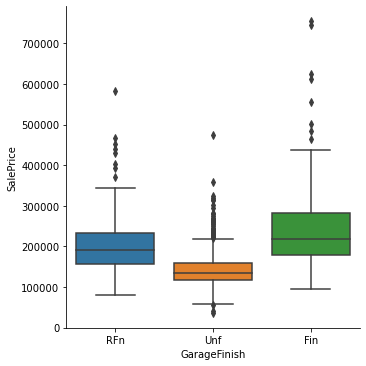

In [83]:
sns.catplot(x="GarageFinish", y="SalePrice", kind="box", data=train)

# GarageQual

TA    1050
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Fa'),
  Text(2, 0, 'Gd'),
  Text(3, 0, 'Ex'),
  Text(4, 0, 'Po')])

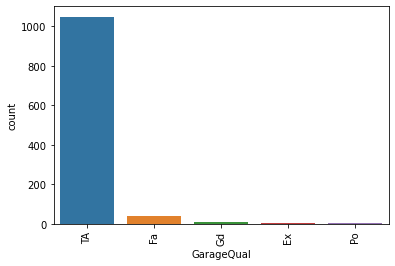

In [84]:
print(train["GarageQual"].value_counts())
sns.countplot(train["GarageQual"])
plt.xticks(rotation=90)

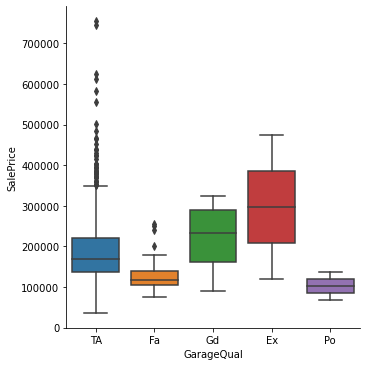

In [85]:
sns.catplot(x="GarageQual", y="SalePrice", kind="box", data=train)

# GarageCond

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Fa'),
  Text(2, 0, 'Gd'),
  Text(3, 0, 'Po'),
  Text(4, 0, 'Ex')])

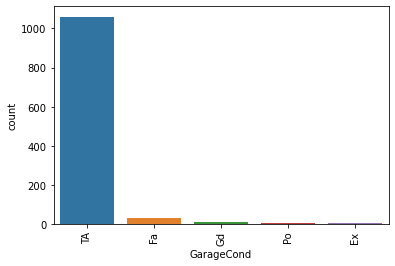

In [86]:
print(train["GarageCond"].value_counts())
sns.countplot(train["GarageCond"])
plt.xticks(rotation=90)

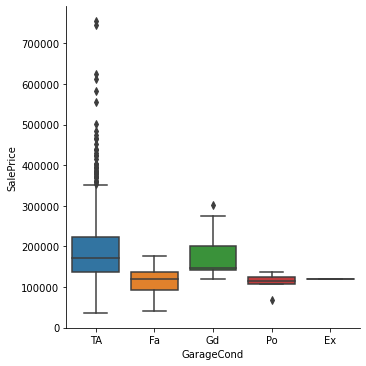

In [87]:
sns.catplot(x="GarageCond", y="SalePrice", kind="box", data=train)

# PavedDrive

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


(array([0, 1, 2]), [Text(0, 0, 'Y'), Text(1, 0, 'N'), Text(2, 0, 'P')])

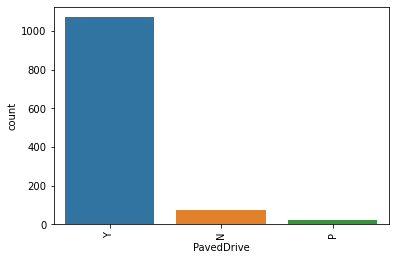

In [88]:
print(train["PavedDrive"].value_counts())
sns.countplot(train["PavedDrive"])
plt.xticks(rotation=90)

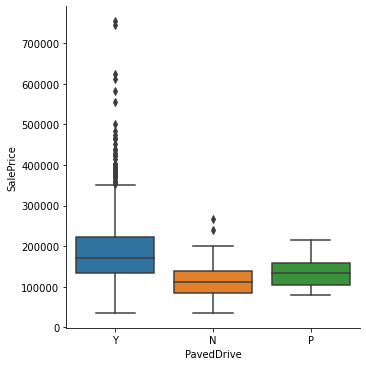

In [89]:
sns.catplot(x="PavedDrive", y="SalePrice", kind="box", data=train)

# SaleType

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
CWD        3
Oth        3
Con        2
Name: SaleType, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'WD'),
  Text(1, 0, 'COD'),
  Text(2, 0, 'New'),
  Text(3, 0, 'ConLI'),
  Text(4, 0, 'ConLw'),
  Text(5, 0, 'Con'),
  Text(6, 0, 'ConLD'),
  Text(7, 0, 'Oth'),
  Text(8, 0, 'CWD')])

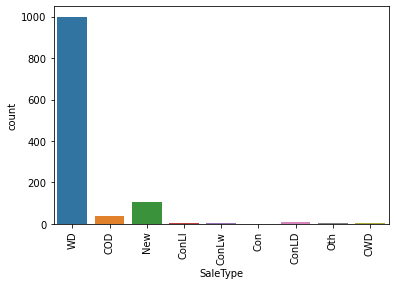

In [90]:
print(train["SaleType"].value_counts())
sns.countplot(train["SaleType"])
plt.xticks(rotation=90)

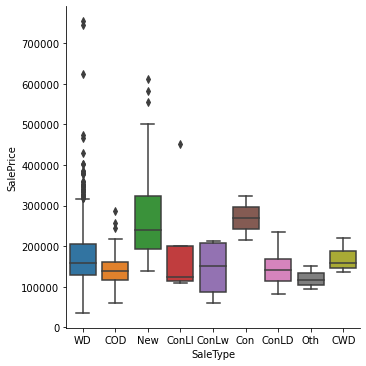

In [91]:
sns.catplot(x="SaleType", y="SalePrice", kind="box", data=train)

# SaleCondition

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Partial'),
  Text(2, 0, 'Abnorml'),
  Text(3, 0, 'Family'),
  Text(4, 0, 'Alloca'),
  Text(5, 0, 'AdjLand')])

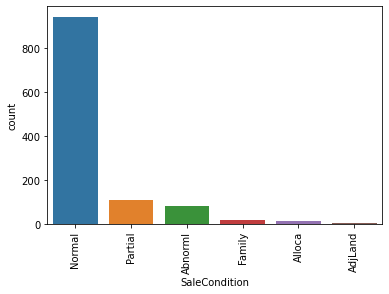

In [92]:
print(train["SaleCondition"].value_counts())
sns.countplot(train["SaleCondition"])
plt.xticks(rotation=90)

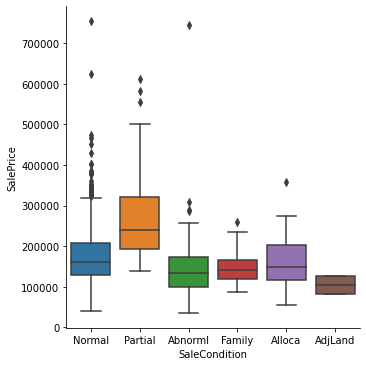

In [93]:
sns.catplot(x="SaleCondition", y="SalePrice", kind="box", data=train)

# Univariate and bivariate analysis of Continous Variables

# LotFrontage

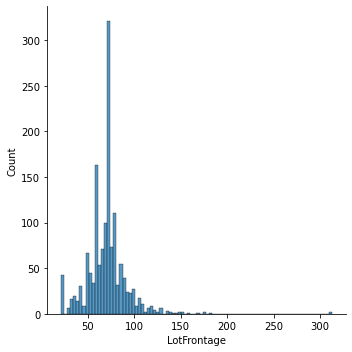

In [94]:
sns.displot(data, x='LotFrontage')

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

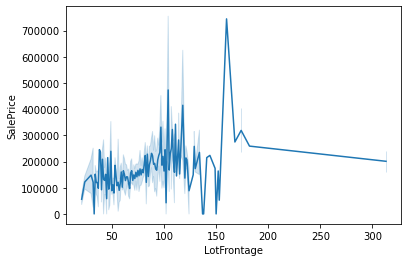

In [95]:
 sns.lineplot(x="LotFrontage", y="SalePrice", data=data)

# LotArea

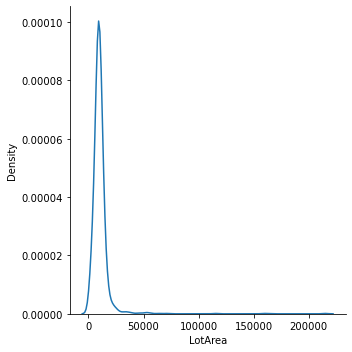

In [96]:
sns.displot(data, x="LotArea",kind="kde")

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

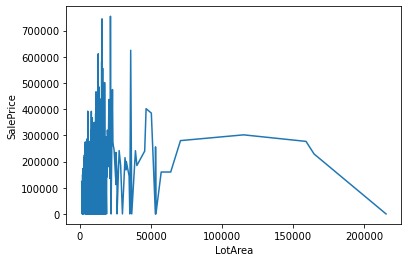

In [97]:
 sns.lineplot(x="LotArea", y="SalePrice", data=data)

# BsmtFinSF1 

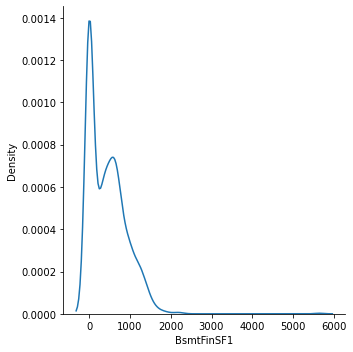

In [98]:
sns.displot(data, x="BsmtFinSF1",kind="kde")

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

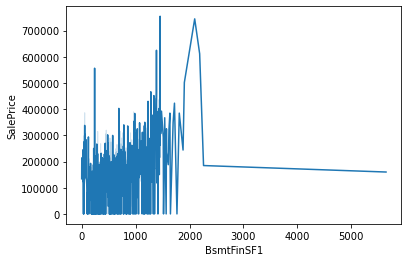

In [99]:
sns.lineplot(x="BsmtFinSF1", y="SalePrice", data=data)

# BsmtUnfSF

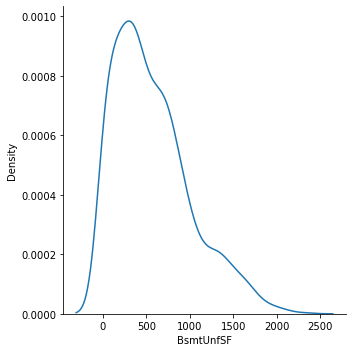

In [100]:
sns.displot(data, x="BsmtUnfSF",kind="kde")

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

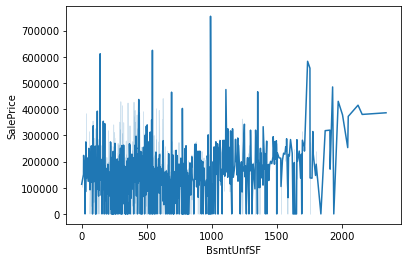

In [101]:
sns.lineplot(x="BsmtUnfSF", y="SalePrice", data=data)

# TotalBsmtSF

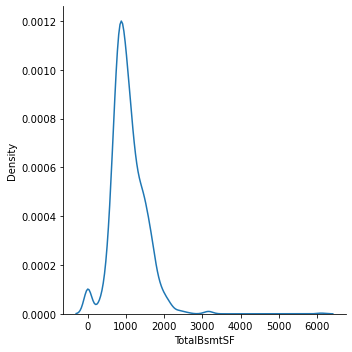

In [102]:
sns.displot(data, x="TotalBsmtSF",kind="kde")

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

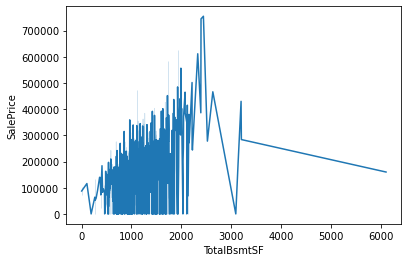

In [103]:
sns.lineplot(x="TotalBsmtSF", y="SalePrice", data=data)

# 1stFlrSF

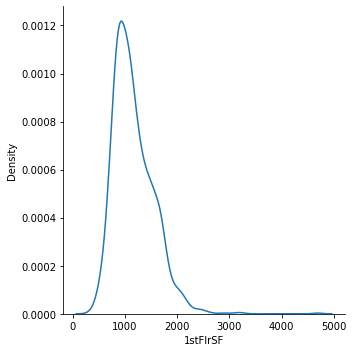

In [104]:
sns.displot(data,x="1stFlrSF",kind="kde")

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

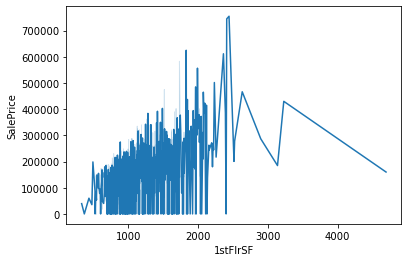

In [105]:
sns.lineplot(x="1stFlrSF", y="SalePrice", data=data)

# 2ndFlrSF

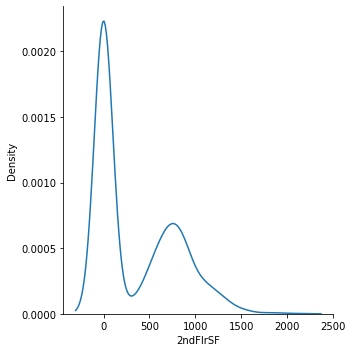

In [106]:
sns.displot(data,x="2ndFlrSF",kind="kde")

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

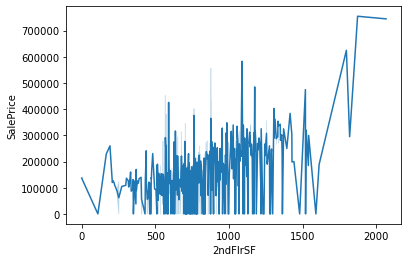

In [107]:
sns.lineplot(x="2ndFlrSF", y="SalePrice", data=data)

# GrLivArea

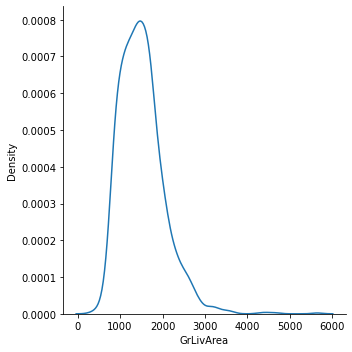

In [108]:
sns.displot(data,x="GrLivArea",kind="kde")

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

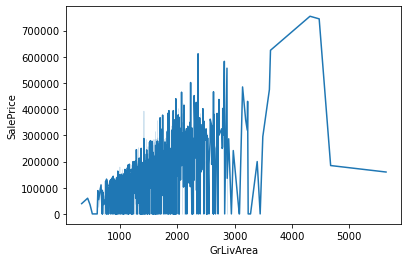

In [109]:
sns.lineplot(x="GrLivArea", y="SalePrice", data=data)

# BsmtFullBath

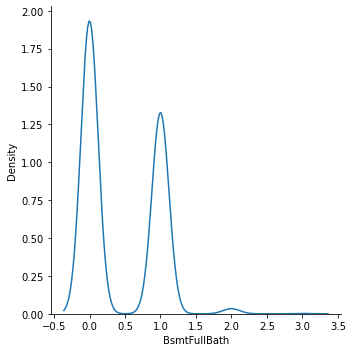

In [110]:
sns.displot(data,x="BsmtFullBath",kind="kde")

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

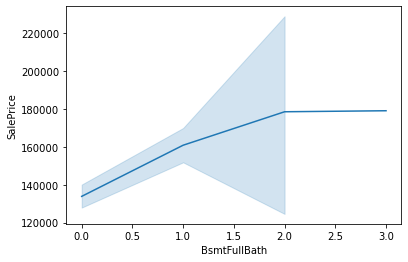

In [111]:
sns.lineplot(x="BsmtFullBath", y="SalePrice", data=data)

# FullBath

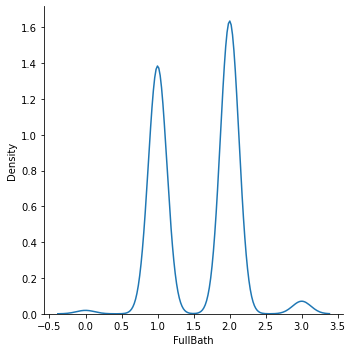

In [112]:
sns.displot(data,x="FullBath",kind="kde")

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

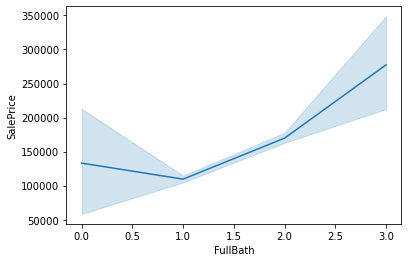

In [113]:
sns.lineplot(x="FullBath", y="SalePrice", data=data)

# HalfBath

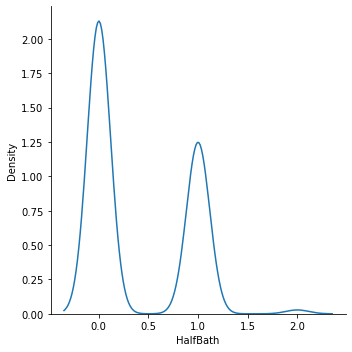

In [114]:
sns.displot(data,x="HalfBath",kind="kde")

<AxesSubplot:xlabel='HalfBath', ylabel='SalePrice'>

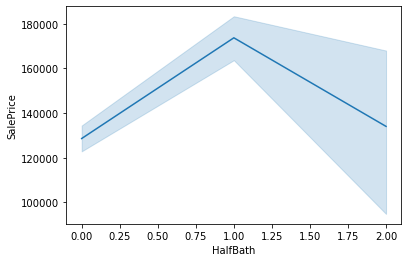

In [115]:
sns.lineplot(x="HalfBath", y="SalePrice", data=data)

# BedroomAbvGr

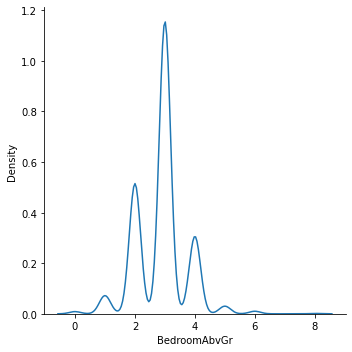

In [116]:
sns.displot(data,x="BedroomAbvGr",kind="kde")

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

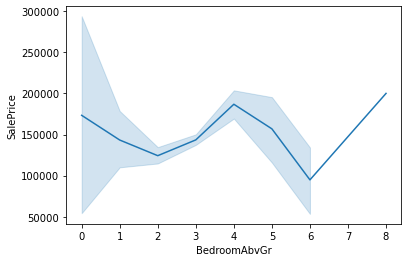

In [117]:
sns.lineplot(x="BedroomAbvGr", y="SalePrice", data=data)

# TotRmsAbvGrd

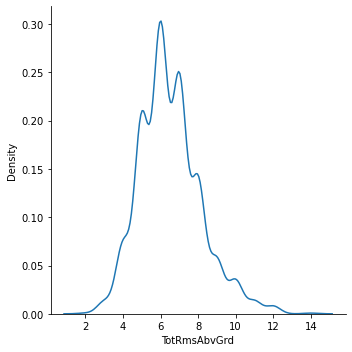

In [118]:
sns.displot(data,x="TotRmsAbvGrd",kind="kde")

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

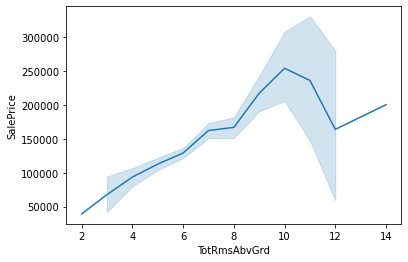

In [119]:
sns.lineplot(x="TotRmsAbvGrd", y="SalePrice", data=data)

# Fireplaces

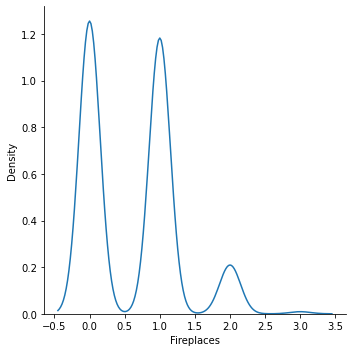

In [120]:
sns.displot(data,x="Fireplaces",kind="kde")

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

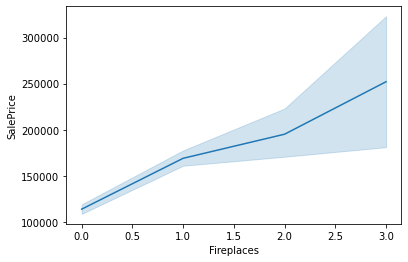

In [121]:
sns.lineplot(x="Fireplaces", y="SalePrice", data=data)

# GarageArea

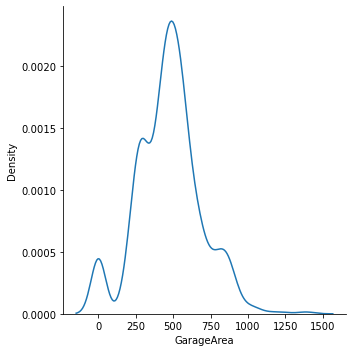

In [122]:
sns.displot(data,x="GarageArea",kind="kde")

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

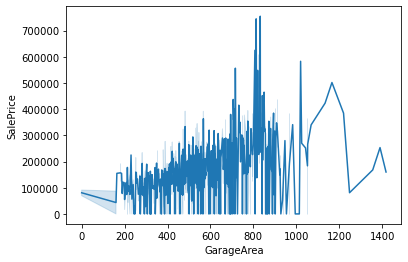

In [123]:
sns.lineplot(x="GarageArea", y="SalePrice", data=data)

# GarageCars

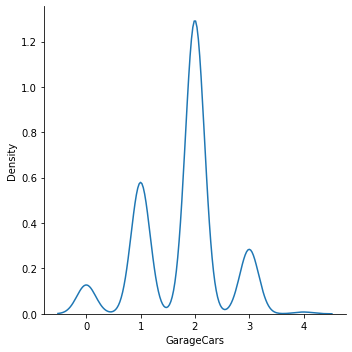

In [124]:
sns.displot(data,x="GarageCars",kind="kde")

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

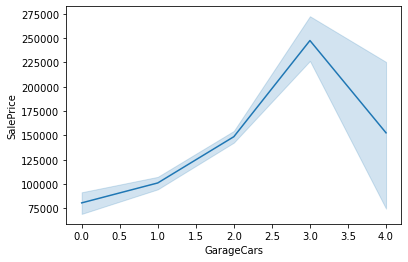

In [125]:
sns.lineplot(x="GarageCars", y="SalePrice", data=data)

# WoodDeckSF

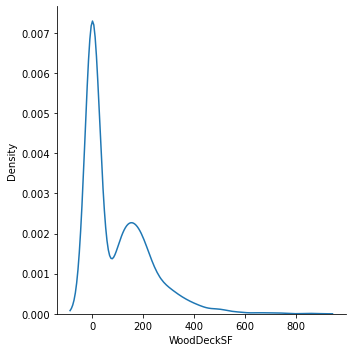

In [126]:
sns.displot(data,x="WoodDeckSF",kind="kde")

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

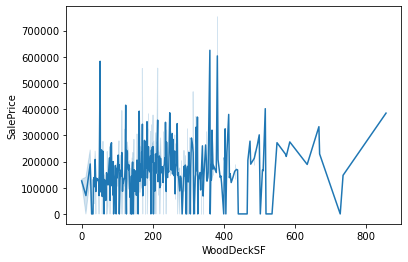

In [127]:
sns.lineplot(x="WoodDeckSF", y="SalePrice", data=data)

# OpenPorchSF

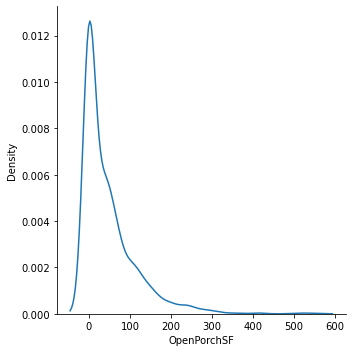

In [128]:
sns.displot(data,x="OpenPorchSF",kind="kde")

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

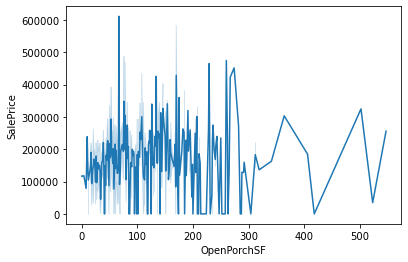

In [129]:
sns.lineplot(x="OpenPorchSF", y="SalePrice", data=data)

# 3SsnPorch

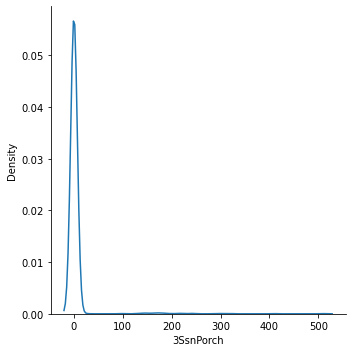

In [130]:
sns.displot(data,x="3SsnPorch",kind="kde")

<AxesSubplot:xlabel='3SsnPorch', ylabel='SalePrice'>

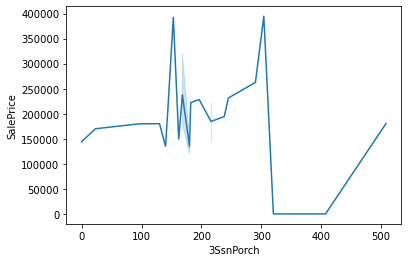

In [131]:
sns.lineplot(x="3SsnPorch", y="SalePrice", data=data)

# ScreenPorch

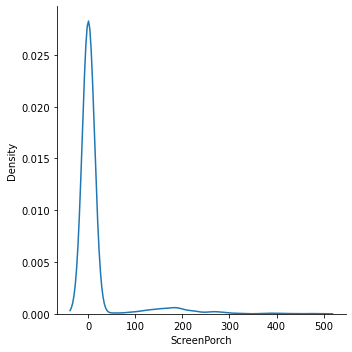

In [132]:
sns.displot(data,x="ScreenPorch",kind="kde")

# PoolArea

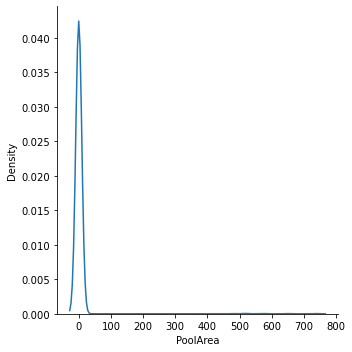

In [133]:
sns.displot(data,x="PoolArea",kind="kde")

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

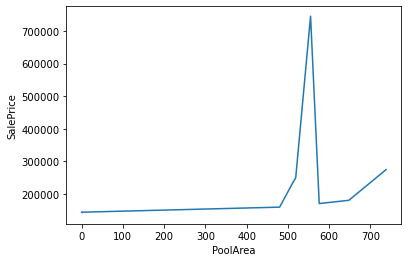

In [134]:
sns.lineplot(x="PoolArea", y="SalePrice", data=data)

# Correlation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'Id'),
  Text(1, 0, 'MSSubClass'),
  Text(2, 0, 'LotFrontage'),
  Text(3, 0, 'LotArea'),
  Text(4, 0, 'OverallQual'),
  Text(5, 0, 'OverallCond'),
  Text(6, 0, 'YearBuilt'),
  Text(7, 0, 'YearRemodAdd'),
  Text(8, 0, 'MasVnrArea'),
  Text(9, 0, 'BsmtFinSF1'),
  Text(10, 0, 'BsmtFinSF2'),
  Text(11, 0, 'BsmtUnfSF'),
  Text(12, 0, 'TotalBsmtSF'),
  Text(13, 0, '1stFlrSF'),
  Text(14, 0, '2ndFlrSF'),
  Text(15, 0, 'LowQualFinSF'),
  Text(16, 0, 'GrLivArea'),
  Text(17, 0, 'BsmtFullBath'),
  Text(18, 0, 'BsmtHalfBath'),
  Text(19, 0, 'FullBath'),
  Text(20, 0, 'HalfBath'),
  Text(21, 0, 'BedroomAbvGr'),
  Text(22, 0, 'KitchenAbvGr'),
  Text(23, 0, 'TotRmsAbvGrd'),
  Text(24, 0, 'Fireplaces'),
  Text(25, 0, 'GarageCars'),
  Text(26, 0, 'GarageArea'),
  Text(27, 0, 'WoodDeckSF'),
  Text(28, 0, 'OpenPorchSF'),
  

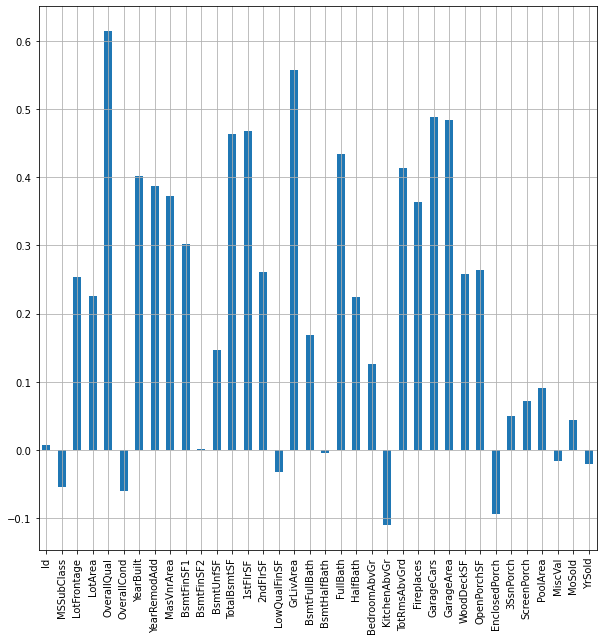

In [135]:
plt.figure(figsize=(10,10))
data.drop("SalePrice",axis=1).corrwith(train["SalePrice"]).plot(kind="bar",grid=True)
plt.xticks(rotation="vertical")

In [136]:
#Lets drop all the negatively correlated variables
data.drop(["Id","MSSubClass","OverallCond","BsmtFinSF2","LowQualFinSF","TotRmsAbvGrd","EnclosedPorch","YrSold"],axis=1,inplace=True)

# Outliers

LotFrontage         AxesSubplot(0.125,0.71587;0.0824468x0.16413)
LotArea          AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
OverallQual      AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
YearBuilt        AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
YearRemodAdd     AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
MasVnrArea       AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
BsmtFinSF1       AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
BsmtUnfSF        AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
TotalBsmtSF        AxesSubplot(0.125,0.518913;0.0824468x0.16413)
1stFlrSF        AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
2ndFlrSF        AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
GrLivArea       AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
BsmtFullBath    AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
BsmtHalfBath    AxesSubplot(0.619681,0.518913;0.0824468x0.16413)
FullBath        AxesSubplot(0.718617,0.518913;0.0824468x0.16413)
HalfBath        AxesSubpl

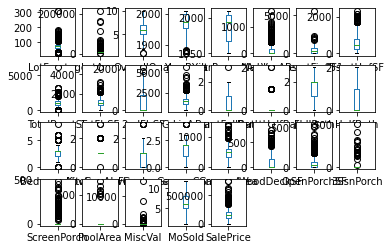

In [137]:
#Lets see now the whether the outliers are present or not
data.plot(kind="box",layout=(4,8),subplots=True)

# LotFrontage

<AxesSubplot:>

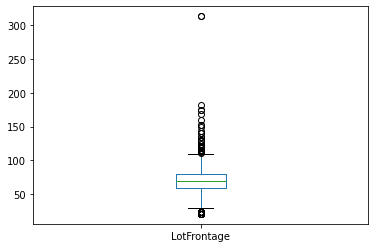

In [138]:
train["LotFrontage"].plot(kind="box")

In [139]:
print(data["LotFrontage"].quantile(0.10))
print(data['LotFrontage'].quantile(0.90))

49.0
92.0


In [140]:
data["LotFrontage"] = np.where(data["LotFrontage"] <49,49,data['LotFrontage'])
data["LotFrontage"] = np.where(data["LotFrontage"] >92,92,data['LotFrontage'])

# LotArea

<AxesSubplot:>

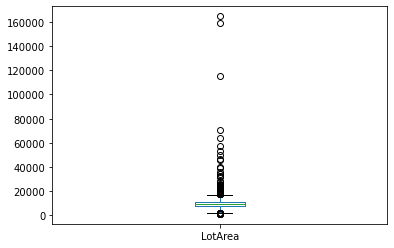

In [141]:
train["LotArea"].plot(kind="box")

In [142]:
print(data["LotArea"].quantile(0.10))
print(data['LotArea'].quantile(0.90))

5000.0
14381.70000000001


In [143]:
data["LotArea"] = np.where(data["LotArea"] <5000.0,5000.0,data['LotArea'])
data["LotArea"] = np.where(data["LotArea"] >14381.70000000001,14381.70000000001,data['LotArea'])

# MasVnrArea

<AxesSubplot:>

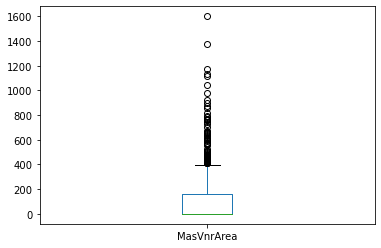

In [144]:
train["MasVnrArea"].plot(kind="box")

In [145]:
print(data["MasVnrArea"].quantile(0.90))

335.0


In [146]:
data["MasVnrArea"] = np.where(data["MasVnrArea"] >335,335,data['MasVnrArea'])

# BsmtFinSF1 

<AxesSubplot:>

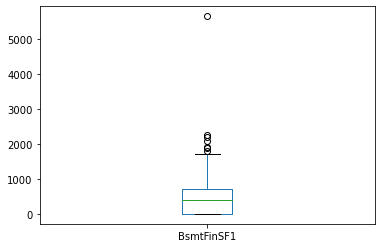

In [147]:
train["BsmtFinSF1"].plot(kind="box")

In [148]:
print(data['BsmtFinSF1'].quantile(0.90))

1065.5000000000007


In [149]:
data["BsmtFinSF1"] = np.where(data["BsmtFinSF1"] >1065.5000000000007,1065.5000000000007,data['BsmtFinSF1'])

# BsmtUnfSF

<AxesSubplot:>

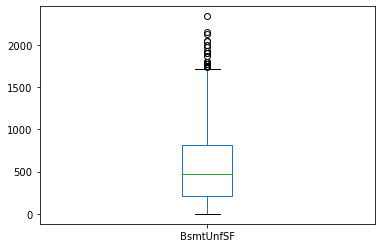

In [150]:
train["BsmtUnfSF"].plot(kind="box")

In [151]:
print(data['BsmtUnfSF'].quantile(0.90))

1232.0


In [152]:
data["BsmtUnfSF"] = np.where(data["BsmtUnfSF"] >1232.0,1232.0,data['BsmtUnfSF'])

# TotalBsmtSF

<AxesSubplot:>

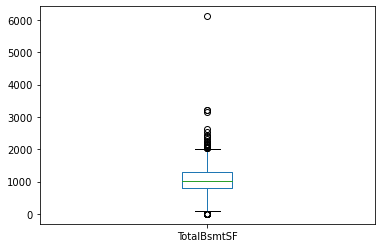

In [153]:
train["TotalBsmtSF"].plot(kind="box")

In [154]:
print(data["TotalBsmtSF"].quantile(0.10))
print(data['TotalBsmtSF'].quantile(0.90))

636.9
1602.2000000000003


In [155]:
data["TotalBsmtSF"] = np.where(data["TotalBsmtSF"] <636.9,636.9,data['TotalBsmtSF'])
data["TotalBsmtSF"] = np.where(data["TotalBsmtSF"] >1602.2000000000003,1602.2000000000003,data['TotalBsmtSF'])

# 1stFlrSF

<AxesSubplot:>

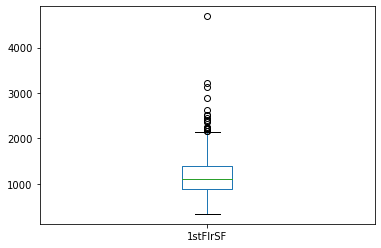

In [156]:
train["1stFlrSF"].plot(kind="box")

In [157]:
print(data["1stFlrSF"].quantile(0.10))
print(data['1stFlrSF'].quantile(0.90))

756.9
1680.0


In [158]:
data["1stFlrSF"] = np.where(data["1stFlrSF"] <756,756,data['1stFlrSF'])
data["1stFlrSF"] = np.where(data["1stFlrSF"] >1680,1680,data['1stFlrSF'])

# 2ndFlrSF

<AxesSubplot:>

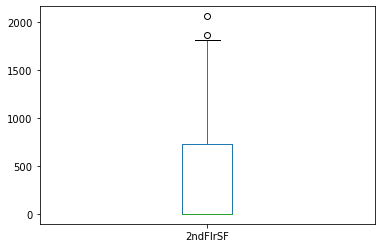

In [159]:
train["2ndFlrSF"].plot(kind="box")

In [160]:
print(data['2ndFlrSF'].quantile(0.90))

954.2000000000003


In [161]:
data["2ndFlrSF"] = np.where(data["2ndFlrSF"] >954.2000000000003,954.2000000000003,data['2ndFlrSF'])

# Label Encoding

In [162]:
#Lets create a data frame which contains all the categorical variables
list1=["LotFrontage","MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","MasVnrArea","GarageYrBlt",
"Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical","KitchenQual","Functional","GarageType","GarageFinish","GarageQual","GarageCond","PavedDrive","SaleType","SaleCondition"]

In [163]:
from sklearn.preprocessing import LabelEncoder

oe=LabelEncoder()

for val in list1:
    data[val]=oe.fit_transform(data[val].astype(str))

# Seperating train and test sets

In [164]:
train=data.loc[data["source"]=="train"]
test=data.loc[data["source"]=="test"]

In [165]:
train.drop("source",axis=1,inplace=True)

In [166]:
test.drop(["source","SalePrice"],axis=1,inplace=True)

# Model Building

In [167]:
y=train["SalePrice"]

In [168]:
y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [169]:
x=train.drop(["SalePrice"],inplace=True,axis=1)

In [170]:
x=train

In [171]:
x.dtypes

MSZoning           int32
LotFrontage        int32
LotArea          float64
Street             int32
LotShape           int32
                  ...   
PoolArea           int64
MiscVal            int64
MoSold             int64
SaleType           int32
SaleCondition      int32
Length: 67, dtype: object

# PCA

In [172]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(x)

PCA(n_components=10)

# StandardScaler

In [173]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,BayesianRidge
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures


from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [175]:
regressors_list=[LinearRegression(),BayesianRidge(),Lasso(),Ridge()]

In [176]:
for i in regressors_list:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.3)
    print("Model: ",i)
    regressor=i.fit(x_train,y_train)
    pred=regressor.predict(x_test)
    print(r2_score(y_test,pred))
    print("Mean absolute error :",mean_absolute_error(y_test,pred))
    print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred)))
    print("*******************************************************************")

Model:  LinearRegression()
0.8636804081480141
Mean absolute error : 21173.04909973912
Root mean squared error:  28644.613351299955
*******************************************************************
Model:  BayesianRidge()
0.8661481243675244
Mean absolute error : 20725.10259952297
Root mean squared error:  28384.160670479116
*******************************************************************
Model:  Lasso()
0.8637192255565689
Mean absolute error : 21169.304550001325
Root mean squared error:  28640.53474157698
*******************************************************************
Model:  Ridge()
0.8637354524594751
Mean absolute error : 21166.636656637493
Root mean squared error:  28638.829581720514
*******************************************************************


In [177]:
for m in regressors_list:
    score=cross_val_score(m,x,y,cv=10,scoring="r2")
    print("Model ",m)
    print("Score ",score)
    print('Mean score :',score.mean())
    print("Standard Deviation :",score.std())
    print("_______________________________")

Model  LinearRegression()
Score  [0.89800012 0.76158752 0.84435495 0.64684402 0.83943657 0.4570908
 0.8892385  0.83916626 0.83355513 0.81434075]
Mean score : 0.7823614638690154
Standard Deviation : 0.12781375072721496
_______________________________
Model  BayesianRidge()
Score  [0.89787766 0.76370965 0.84075284 0.6872103  0.84176503 0.53258449
 0.89067984 0.83428446 0.83386676 0.83114525]
Mean score : 0.7953876284936494
Standard Deviation : 0.10480325049774046
_______________________________
Model  Lasso()
Score  [0.8980067  0.7616502  0.84445309 0.64730382 0.8396274  0.45700285
 0.88917267 0.83939733 0.83362678 0.81481183]
Mean score : 0.7825052662392166
Standard Deviation : 0.1278197975595748
_______________________________
Model  Ridge()
Score  [0.89807344 0.76153884 0.84437181 0.64905623 0.83953614 0.46151434
 0.88925219 0.83919859 0.83361992 0.81523164]
Mean score : 0.7831393134959523
Standard Deviation : 0.12649432703772742
_______________________________


# Ensemble Techniques

In [178]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

In [179]:
ens=[RandomForestRegressor(),ExtraTreesRegressor(),DecisionTreeRegressor()]

In [180]:
for i in ens:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.3)
    print("Model: ",i)
    regressor=i.fit(x_train,y_train)
    pred=regressor.predict(x_test)
    print("r2 score: ",r2_score(y_test,pred))
    print("Mean absolute error :",mean_absolute_error(y_test,pred))
    print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred)))
    print("*******************************************************************")

Model:  RandomForestRegressor()
r2 score:  0.9019897956056007
Mean absolute error : 16654.86868945869
Root mean squared error:  24288.431697632797
*******************************************************************
Model:  ExtraTreesRegressor()
r2 score:  0.8992454604271561
Mean absolute error : 16127.316666666668
Root mean squared error:  24626.128270724115
*******************************************************************
Model:  DecisionTreeRegressor()
r2 score:  0.7606464506387808
Mean absolute error : 25944.330484330483
Root mean squared error:  37956.29050275257
*******************************************************************


In [181]:
for m in ens:
    score=cross_val_score(m,x,y,cv=10,scoring="r2")
    print("Model ",m)
    print("Score ",score)
    print('Mean score :',score.mean())
    print("Standard Deviation :",score.std())
    print("_______________________________")

Model  RandomForestRegressor()
Score  [0.90766934 0.90107261 0.87963776 0.77060195 0.91633228 0.74709992
 0.82477984 0.91108813 0.8401463  0.78156404]
Mean score : 0.8479992160824367
Standard Deviation : 0.06100276162813035
_______________________________
Model  ExtraTreesRegressor()
Score  [0.90759467 0.87002202 0.87881034 0.68934082 0.91000877 0.67436598
 0.87136992 0.90305427 0.86207097 0.83775107]
Mean score : 0.8404388827282157
Standard Deviation : 0.08213453759206224
_______________________________
Model  DecisionTreeRegressor()
Score  [0.62942628 0.81188376 0.76274044 0.4946513  0.69331705 0.3071842
 0.56417178 0.83146636 0.73456269 0.65818698]
Mean score : 0.6487590842678371
Standard Deviation : 0.1517798716828921
_______________________________


# RandomForestRegressor

In [182]:
rfr=RandomForestRegressor()
regressor=rfr.fit(x_train,y_train)
pred=regressor.predict(x_test)
print("r2 score: ",r2_score(y_test,pred))
print("Mean absolute error :",mean_absolute_error(y_test,pred))
print("Mean squared absolute error :",mean_absolute_error(y_test,pred))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred)))
print("*******************************************************************")

r2 score:  0.9039623453815679
Mean absolute error : 16588.72096866097
Mean squared absolute error : 16588.72096866097
Root mean squared error:  24042.775355214788
*******************************************************************


In [183]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [184]:
#Declare data preprocessing steps
pipelinerf = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

In [185]:
#Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [186]:
#Tune model using cross-validation pipeline
clf = GridSearchCV(pipelinerf, hyperparameters, cv=10)
hy=clf.fit(x_train, y_train)

In [187]:
pred=hy.predict(x_test)
print("r2 score: ",r2_score(y_test,pred))
print("Mean absolute error :",mean_absolute_error(y_test,pred))
print("Mean squared absolute error :",mean_absolute_error(y_test,pred))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred)))
print("*******************************************************************")

r2 score:  0.9030407683504094
Mean absolute error : 15973.421225071224
Mean squared absolute error : 15973.421225071224
Root mean squared error:  24157.857131565182
*******************************************************************


# Predecting test data set

In [188]:
pred_test=clf.predict(test)

In [189]:
pred_test

array([363864.39, 365010.71, 386453.87, 357505.5 , 386576.64, 291044.45,
       351139.53, 355467.18, 363151.17, 353746.59, 364413.02, 358363.05,
       352848.15, 367880.22, 369400.39, 333721.89, 303686.02, 353685.63,
       364786.83, 363445.82, 336551.15, 375392.13, 353972.46, 298184.67,
       340998.63, 356762.13, 373505.58, 348772.72, 368229.73, 350018.93,
       350948.65, 355473.42, 358357.79, 373700.57, 362183.89, 390984.44,
       384129.46, 377475.46, 362402.99, 370817.47, 335171.83, 373981.87,
       386439.78, 355465.49, 346891.67, 334796.76, 353419.53, 342413.62,
       356291.16, 375955.4 , 345550.44, 356343.2 , 331542.15, 349641.14,
       391659.93, 361149.87, 354982.21, 373345.58, 358029.83, 362544.01,
       350054.51, 387139.03, 345112.96, 363912.32, 363382.79, 354973.23,
       360561.64, 361491.36, 357028.47, 359335.79, 359143.41, 352558.16,
       352280.32, 363420.61, 366744.65, 377614.8 , 393087.77, 340871.61,
       368645.62, 369988.95, 387188.54, 354534.66, 

# End Of Document